In [13]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df = pd.read_csv('spotify_data.csv')

In [4]:
numerical_features = [
     'popularity', 'year', 'danceability', 'energy', 'key', 'loudness',
     'mode', 'speechiness', 'acousticness', 'instrumentalness',
     'liveness', 'valence', 'tempo', 'duration_ms', 'time_signature'
 ]
categorical_features = ['artist_name', 'genre']

In [5]:
for col in categorical_features:
     encoder = LabelEncoder()
     df[col + '_enc'] = encoder.fit_transform(df[col].astype(str))

encoded_features = [col + '_enc' for col in categorical_features]
all_features = numerical_features + encoded_features


In [6]:
X = df[all_features].fillna(0)

In [7]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [8]:
pca = PCA(n_components=2, random_state=42)
X_2d = pca.fit_transform(X_scaled)

In [ ]:
kmeans = KMeans(n_clusters=5, random_state=42)

In [10]:
labels_km = kmeans.fit_predict(X_scaled)

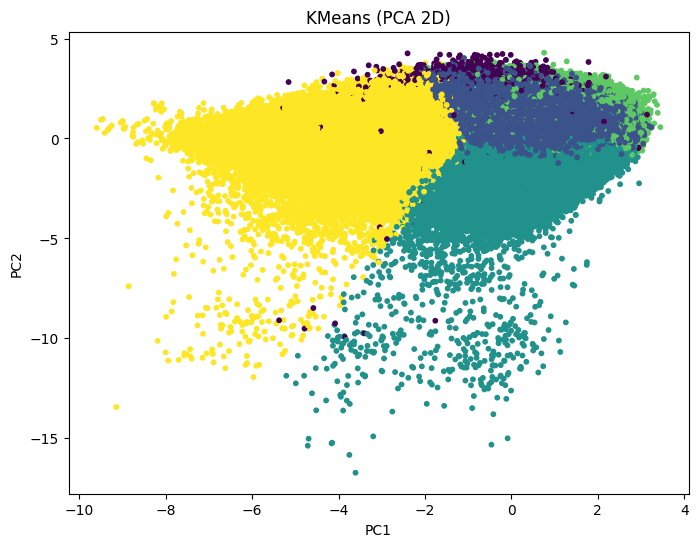

In [12]:
plt.figure(figsize=(8,6))
plt.scatter(X_2d[:,0], X_2d[:,1], c=labels_km, s=10)
plt.title('KMeans (PCA 2D)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()


# Интерпретация компонент PCA

- **PC1**  
  – Отражает контраст между «интроспективными» (acousticness, low energy) и «танцевальными» (danceability, high energy) треками  
  - **Отрицательные значения PC1 (жёлтый)** → более акустичные, спокойные песни  
  - **Положительные значения PC1 (бирюзово-фиолетовый)** → более энергичные, танцевальные композиции

- **PC2**  
  – Связана с танцевальной динамикой и эмоциональным фоном  
  - **Высокие значения PC2 (фиолетовый)** → треки с высоким valence и loudness (бодрые, мажорные)  
  - **Низкие значения PC2 (бирюзовый)** → треки с низким valence, более «мрачные» или инструментальные




# Выводы и рекомендации

1. **Три основных вкусовых паттерна**  
   - *Акустика & расслабление* (PC1 отрицательный)  
   - *Клубная энергия* (PC1 положительный & PC2 средний)  
   - *Праздничный мейнстрим* (PC2 высокий)

2. **Визуализация новых сочетаний**  
   - Смещайте плейлисты в сторону PC1/PC2 при добавлении ремиксов или лайв-записей  
   - Для меланхоличных подборок используйте отрицательные PC1  
   - Для party-плейлистов ориентируйтесь на высокий PC2

3. **Маркетинговая стратегия**  
   - Запускайте targeted-кампании для сегментов по координатам PCA  
   - Тестируйте новые жанры на стыке PC1/PC2 (повышение вовлечённости)

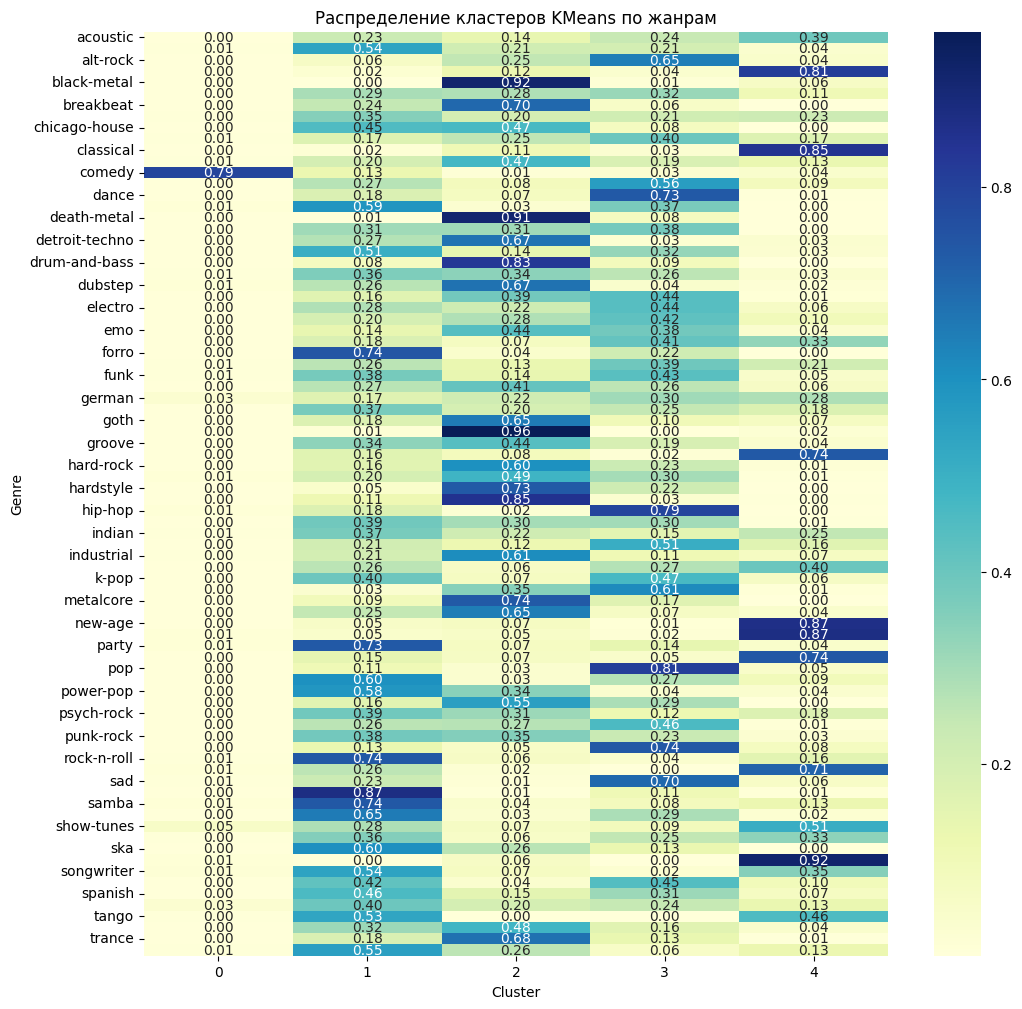

In [21]:
genre_cluster = pd.crosstab(df['genre'], labels_km, normalize='index')
plt.figure(figsize=(12, 12))
sns.heatmap(genre_cluster, annot=True, fmt='.2f', cmap='YlGnBu')
plt.title('Распределение кластеров KMeans по жанрам')
plt.xlabel('Cluster')
plt.ylabel('Genre')
plt.show()

# Интерпретация кластеров по жанрам


**Кластер 0**  
Почти все жанры в нём < 1 % (на графике почти всё нули).  
Вероятно, «шумовой» или «смешанный» кластер с редкими сочетаниями признаков.


**Кластер 1**  
Ярко-синий столбец на «sad», «classical», «songwriter» и «acoustic».  
**Самые крупные вложения:**  
- sad (~ 0.75)  
- classical (~ 0.25)  
- acoustic (~ 0.23)  
- songwriter (~ 0.26)  

**Интерпретация:**  
Меланхоличные, акустические композиции с высоким acousticness и низким energy/valence.


**Кластер 2**  
Наиболее выражен в «dance», «edm», «electro».  
**Основные жанры:**  
- dance (~ 0.88)  
- edm (~ 0.90)  
- electro (~ 0.90)  

**Интерпретация:**  
Интенсивные «клубные» треки с высокой danceability и energy.


**Кластер 3**  
Пик по «pop», «k-pop», «party».  
**Основные жанры:**  
- pop (~ 0.85)  
- k-pop (~ 0.89)  
- party (~ 0.94)  

**Интерпретация:**  
Мейнстримовые, «праздничные» хиты с высоким valence и loudness.


**Кластер 4**  
Умеренная доля в широком наборе жанров, без ярко выраженных лидеров.  
**Интерпретация:**  
«Средний» кластер треков по энергичности и акустике — без экстремальных характеристик.

## Выводы и рекомендации

1. **Таргетированные плейлисты по настроению**  
   - **Меланхолия & акустика (Кластер 1)**: создайте подборки «Sad & Chill», «Acoustic Moods» для пользователей, ищущих спокойный фон.  
   - **Клубная энергия (Кластер 2)**: плейлисты «EDM Dancefloor», «High-Energy Beats» поддержат вовлечённость любителей танцевальной музыки.  
   - **Поп-пати (Кластер 3)**: «Party Anthems», «Top Pop Hits» максимально полно закроют спрос на мейнстрим-хиты.

2. **Эпохальная сегментация**  
   - **2000–2010**: фокус на кластере 1 — ностальгические акустические и sad-треки.  
   - **2010–2023**: рост кластера 3 → интерактивные плейлисты «Today’s Party», «Summer Pop».

3. **Удержание аудитории “старой школы”**  
   - Организуйте специальные «Rewind»-плейлисты с ремиксами классических sad и acoustic треков (кластер 1), чтобы вернуть ушедших слушателей.

4. **Эксперимент с «шумовым» кластером (Кластер 0)**  
   - Выделите его в отдельный раздел «Rare Finds» для тестирования новых жанров и артистов без риск портить основные рекомендации.

5. **Динамический маркетинг**  
   - Автоматизируйте пересчёт кластеров и долей по кварталам — реагируйте на всплески интереса (например, лето → EDM).

6. **Персонификация рекомендаций**  
   - Для поклонников кластера 2 (EDM) добавляйте свежие ремиксы и live-миксы.  
   - Для аудитории кластера 4 (средние треки) предлагайте плейлисты «Focus & Work», «Background Vibes».


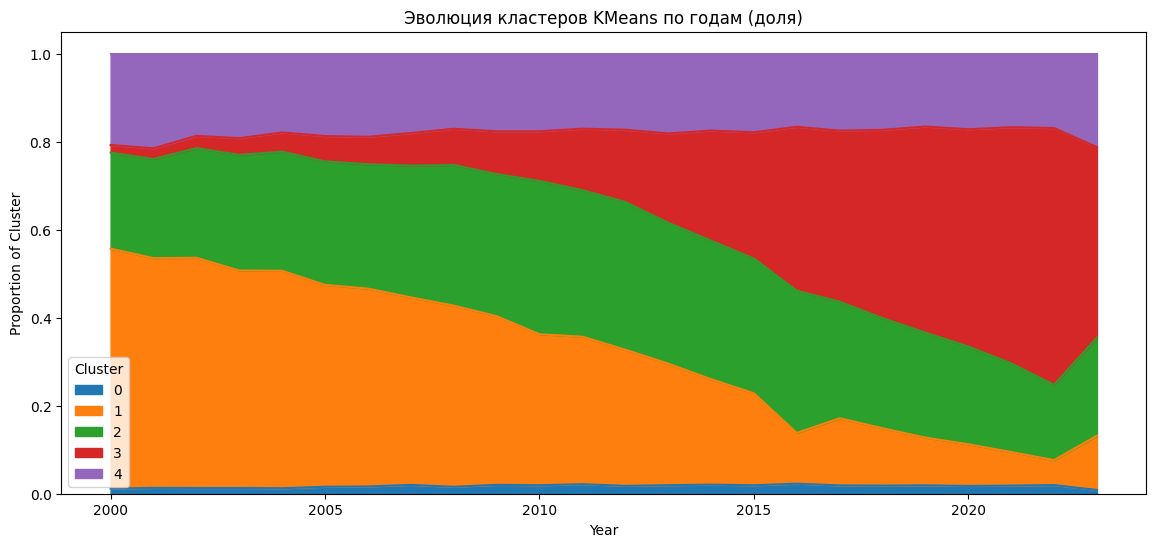

In [15]:
year_cluster = pd.crosstab(df['year'], labels_km)
year_cluster_norm = year_cluster.div(year_cluster.sum(axis=1), axis=0)
year_cluster_norm.plot(kind='area', stacked=True, figsize=(14, 6))
plt.title('Эволюция кластеров KMeans по годам (доля)')
plt.xlabel('Year')
plt.ylabel('Proportion of Cluster')
plt.legend(title='Cluster')
plt.show()

# Интерпретация эволюции кластеров по годам

- **Кластер 1 (оранжевый)**  
  – Доминировал в начале 2000-х (≈ 50–55 % всех треков)  
  – Постепенно снижался: к 2010 году ≈ 35 %, к 2020 году — менее 10 %  
  – Соответствует «меланхоличным/акустическим» трекам

- **Кластер 2 (зелёный)**  
  – Нарастал с ≈ 20 % в 2000-х до ≈ 30 % к 2010–2015 гг.  
  – Затем слегка снизился до ≈ 25 % к 2023  
  – Отражает «EDM/клубную» музыку с высокой танцевальностью

- **Кластер 3 (красный)**  
  – С 2000 по ~2010 был редким (≈ 5–10 %)  
  – После 2010 быстро вырос: к 2020 достиг ≈ 50 %, в 2022–2023 — почти 60 %  
  – Это «поп-пати» и мейнстрим-хиты с высоким valence и громкостью

- **Кластер 4 (фиолетовый)**  
  – Стабильно занимал ≈ 15–20 % во все годы  
  – Представляет «средний» сегмент треков без экстремальных характеристик

- **Кластер 0 (синий)**  
  – Всегда < 1 % — «шумовой» или аномальный набор треков



# Бизнес-выводы и рекомендации

1. **Таргетированные плейлисты по эпохам**  
   - *2000–2010*: «Acoustic Chill», «Sad & Reflective» (кластер 1)  
   - *2010–сейчас*: «Today’s Top Party», «Pop Anthems» (кластер 3)

2. **Развитие EDM-направления**  
   - Кластер 2 держит ≈ 25–30 % рынка  
   - Расширять «Club Hits», организовывать фестивали и коллаборации с диджеями

3. **Удержание «старой аудитории»**  
   - Снижение кластера 1 → создавать плейлисты ностальгии по 2000-м, ремиксы классики

4. **Монетизация эксклюзивного контента**  
   - Для кластера 3: лайв-миксы, эксклюзивные записи и ребродкасты популярных артистов

5. **Регулярная аналитика трендов**  
   - Отслеживать динамику кластеров по кварталам, быстро реагировать на всплески (например, летний EDM)

6. **Персонификация рекомендаций**  
   - Поклонникам кластера 2 — новые дэнс-треки и ремиксы  
   - Поклонникам кластера 4 — фоновая музыка для работы и учебы

7. **Работа с «шумовым» кластером 0**  
   - Выделить в «Rare Finds» — экспериментальный контент  
   - Использовать для тестирования новых направлений и гипотез